In [ ]:
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
data = pd.read_csv('airbnb prices.csv')

In [ ]:
data.shape

(18723, 20)

In [ ]:
data.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


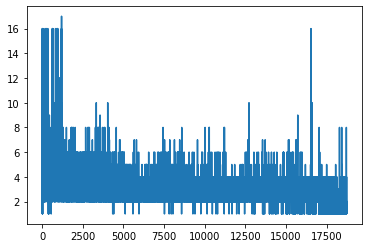

In [ ]:
plt.plot(data.accommodates)
plt.show()

In [ ]:
pyo.plot([{
    'x' : data.index,
    'y' : data.accommodates
}])

'temp-plot.html'

Bar Plots

In [ ]:
fig = go.Figure([go.Bar(x=data.index, y=data.accommodates)])
fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Satisfaction', x=data.index, y=data.overall_satisfaction),
    go.Bar(name='Accommodates', x=data.index, y=data.accommodates)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Satisfaction', x=data.index, y=data.overall_satisfaction),
    go.Bar(name='Accommodates', x=data.index, y=data.accommodates)
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In [ ]:
room_type = data.pivot_table('accommodates', index='room_type')
room_type

,accommodates
room_type,
Entire home/apt,3.093003
Private room,2.224063
Shared room,3.063492


In [ ]:
fig = go.Figure([go.Bar(x=room_type.index, y=room_type.accommodates)])
fig.show()

Histogram

In [ ]:
fig = go.Figure([go.Histogram(x=data.price)])
fig.show()

Scatter Plots

In [ ]:
fig = go.Figure([go.Scatter(x=data.price, y=data.overall_satisfaction, mode='markers')])
fig.show()

In [ ]:
fig = go.Figure([go.Scatter3d(x=data.price, y=data.overall_satisfaction, z = data.accommodates, mode='markers')])
fig.show()

In [ ]:
layout = go.Layout(
    title='Price vs Accomodates vs Satisfaction Chart',
    xaxis = dict(title = 'Price'),
    yaxis = dict(title = 'Satisfaction'),
)

In [ ]:
fig = go.Figure([go.Scatter(x=data.price, y=data.overall_satisfaction, mode='markers')], layout=layout)
fig.show()

In [ ]:
fig = go.Figure([go.Scatter(x=data.price, y=data.reviews, mode='markers', marker = dict(size = data.accommodates))])
fig.show()

In [ ]:
fig = go.Figure([go.Scatter(x=data.price, y=data.overall_satisfaction, mode='markers', marker=dict(size=10, line = dict(width=2)))], layout=layout)
fig.show()

MultiLine Plots

In [ ]:
data1 = go.Scatter(x=data.index, y=data.price, name = 'Price', mode='lines')
data2 = go.Scatter(x=data.index, y=data.reviews, name = 'Reviews', mode='lines')
fig = go.Figure(data=[data1,data2])
fig.show()

In [ ]:
data1 = go.Scatter(x=data.index, y=data.price, name = 'Price', mode='markers+lines')
data2 = go.Scatter(x=data.index, y=data.reviews, name = 'Reviews', mode='markers+lines')
fig = go.Figure(data=[data1,data2])
fig.show()

Box Plot

In [ ]:
ehome = data.price[data['room_type'] == 'Entire home/apt']
proom = data.price[data['room_type'] == 'Private room']
sroom = data.price[data['room_type'] == 'Shared room']
data1 = go.Box(y=ehome, name = 'Entire home/apt')
data2 = go.Box(y=proom, name = 'Private room')
data3 = go.Box(y=sroom, name = 'Shared room')
fig = go.Figure(data=[data1,data2,data3])
fig.show()

In [ ]:
ehome = data.price[data['room_type'] == 'Entire home/apt']
proom = data.price[data['room_type'] == 'Private room']
sroom = data.price[data['room_type'] == 'Shared room']
data1 = go.Box(x=ehome, name = 'Entire home/apt')
data2 = go.Box(x=proom, name = 'Private room')
data3 = go.Box(x=sroom, name = 'Shared room')
fig = go.Figure(data=[data1,data2,data3])
fig.show()

Violin Plot

In [ ]:
data1=go.Violin(y=ehome, box_visible=True, line_color='black',
                               meanline_visible=True, opacity=0.6, fillcolor='lightseagreen',
                               name='Entire home/apt')
data2=go.Violin(y=proom, box_visible=True, line_color='black',
                               meanline_visible=True, opacity=0.6, fillcolor='deeppink',
                               name='Private room')
data3=go.Violin(y=sroom, box_visible=True, line_color='black',
                               meanline_visible=True, opacity=0.6, fillcolor='skyblue',
                               name='Separate room')
fig = go.Figure([data1,data2,data3])
fig.update_layout(yaxis_zeroline=False)
fig.show()

In [ ]:
data1=go.Violin(x=ehome, box_visible=True, line_color='black',
                               meanline_visible=True, opacity=0.6, fillcolor='lightseagreen',
                               name='Entire home/apt')
data2=go.Violin(x=proom, box_visible=True, line_color='black',
                               meanline_visible=True, opacity=0.6, fillcolor='deeppink',
                               name='Private room')
data3=go.Violin(x=sroom, box_visible=True, line_color='black',
                               meanline_visible=True, opacity=0.6, fillcolor='skyblue',
                               name='Separate room')
fig = go.Figure([data1,data2,data3])
fig.update_layout(yaxis_zeroline=False)
fig.show()

Pie Chart

In [ ]:

fig = go.Figure(data=[go.Pie(labels=room_type.index, values=room_type.accommodates, pull = [0,0.1,0])])
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=room_type.index, values=room_type.accommodates, pull = [0,0.1,0], hole = 0.3)])
fig.show()

Geographic Plots

In [ ]:
pop = pd.read_csv('population.csv')

countries  = ['India','China','Bangladesh','Bhutan','Sri Lanka']

new_pop = pop[['Country Name','2019']][pop['Country Name'].isin(countries)]

In [ ]:
new_pop.head()

,Country Name,2019
18,Bangladesh,1.630462e+08
30,Bhutan,7.630920e+05
38,China,1.397715e+09
107,India,1.366418e+09
136,Sri Lanka,2.180300e+07


In [ ]:
data = dict(type = 'choropleth',
            locations = new_pop['Country Name'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'RdBu',
            text= new_pop['Country Name'],
            newz=_pop['2019'])

In [ ]:
layout = dict(geo = dict(scope='asia'))

map = go.Figure(data = [data],layout = layout)

map.show()

Other 3d plots

In [ ]:
# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [ ]:
fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
        "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
    },
    x = [1,2,3,4,5],
    y = [1,2,3,4,5],
    z = [
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0]
    ]))
fig.show()